# # Simple Linear Regression 

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#height in cm
x=np.array([[151],[174],[138],[186],[128],[136],[179],[163],[152],[131]])
# weight in kg
y=np.array([63,81,56,91,47,57,76,72,62,48])

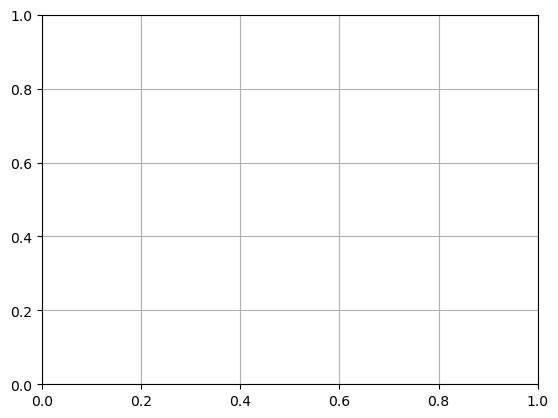

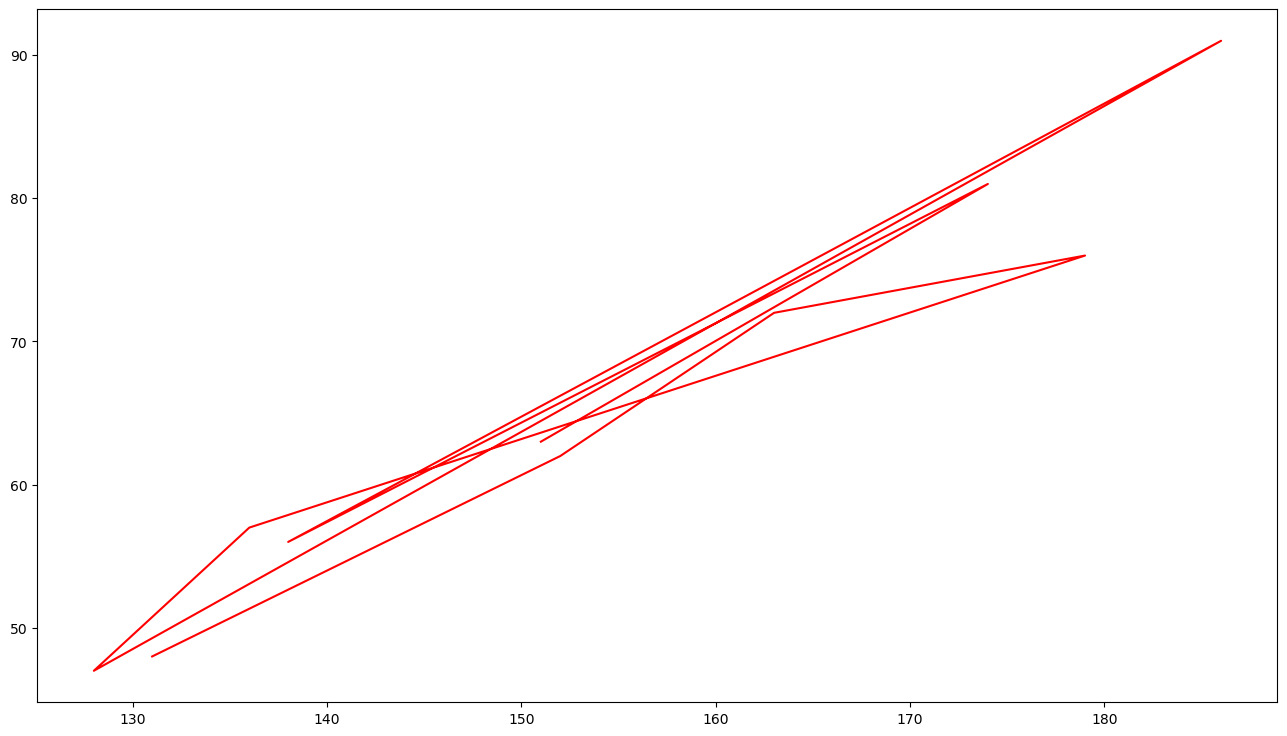

In [4]:
plt.grid()
plt.figure(figsize=(16,9))
plt.plot(x,y,color='red')

In [5]:
x.shape

(10, 1)

In [6]:
y.shape

(10,)

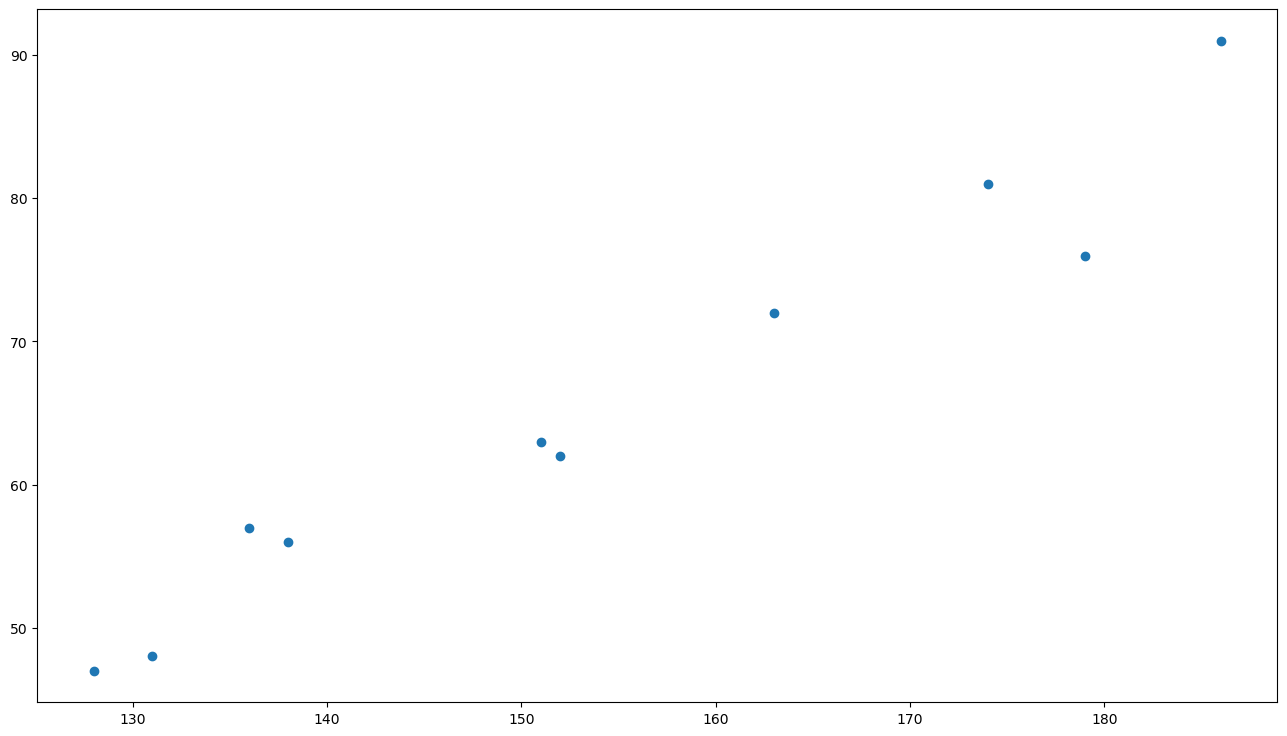

In [7]:
plt.figure(figsize=(16,9))
plt.scatter(x,y)

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
# create the object
regressor=LinearRegression()

In [10]:
# train the model
regressor.fit(x,y)

LinearRegression()

In [11]:
regressor.coef_

array([0.67461045])

In [12]:
# value of intercept
regressor.intercept_

-38.45508707607698

In [13]:
regressor.predict([[185]])

array([86.34784601])

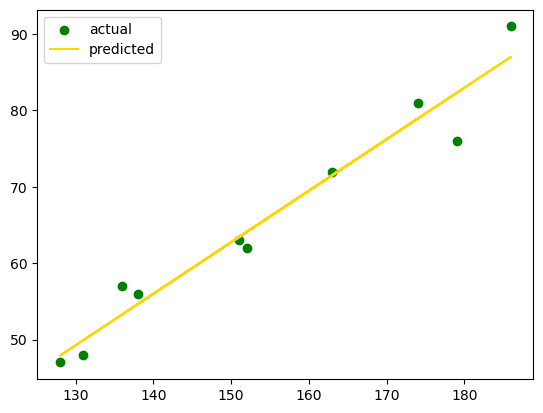

In [14]:
# Plot the data
plt.scatter(x,y,label='actual',color='green')
plt.plot(x,regressor.predict(x),label='predicted',color='gold')
plt.legend( )

# Linear Regression on actual dataset

In [15]:
import pandas as pd

In [16]:
df=pd.read_csv('Salary_Data.csv')

In [17]:
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [18]:
x=df['YearsExperience'].values  #his .values is used to convert array into series

y=df['Salary']

In [19]:
x=x.reshape(30,1)

In [20]:
x.shape

(30, 1)

In [21]:
x

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [22]:
df.corr()  #Pearson Correlation

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [23]:
# Cross Vlidation---> splitting of dataset into training and testing dataset

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.25)

In [25]:
x_train.shape

(22, 1)

In [26]:
x_test.shape

(8, 1)

In [27]:
x_train

array([[ 5.3],
       [ 7.9],
       [ 2.9],
       [ 5.1],
       [ 3.2],
       [ 4.5],
       [ 8.2],
       [ 6.8],
       [ 1.3],
       [10.5],
       [ 3. ],
       [ 2.2],
       [ 5.9],
       [ 6. ],
       [ 3.7],
       [ 3.2],
       [ 9. ],
       [ 2. ],
       [ 1.1],
       [ 7.1],
       [ 4.9],
       [ 4. ]])

# Build the model

In [28]:
from sklearn.linear_model import LinearRegression
regs=LinearRegression()

In [29]:
regs.fit(x_train,y_train)

LinearRegression()

In [30]:
regs.coef_

array([9379.71049195])

In [31]:
regs.intercept_

26986.691316737248

# Prediction on new dataset

In [32]:
y_pred=regs.predict(x_test)

In [33]:
y_pred

array([ 41056.25705466, 123597.70938378,  65443.50433372,  63567.56223533,
       116093.94099022, 108590.17259667, 117031.91203942,  64505.53328452])

# compare predicted and actual output

In [34]:
result=pd.DataFrame({
    'Exprience': x_test.reshape(8),
    'Actual Salary':y_test,
    'Predicted Salary':y_pred
})

In [35]:
result

,Exprience,Actual Salary,Predicted Salary
2,1.5,37731.0,41056.257055
28,10.3,122391.0,123597.709384
13,4.1,57081.0,65443.504334
10,3.9,63218.0,63567.562235
26,9.5,116969.0,116093.940990
24,8.7,109431.0,108590.172597
27,9.6,112635.0,117031.912039
11,4.0,55794.0,64505.533285


# Mean Absolute Error

In [36]:
mae=np.mean(abs(y_test-y_pred))

In [37]:
mae

3508.5455930660555

In [38]:
from sklearn.metrics import mean_absolute_error

In [39]:
mean_absolute_error(y_test,y_pred)

3508.5455930660555

In [40]:
mean_absolute_percentage_error(y_test,y_pred)*100

NameError: name 'mean_absolute_percentage_error' is not defined

In [ ]:
import sklearn
sklearn.__version__

In [ ]:
regs.score(x,y)

In [ ]:
regs.predict([[20]])

In [ ]:
# y=mx+c
20*regs.coef_[0] + regs.intercept_

# Visualize

ValueError: x and y must be the same size

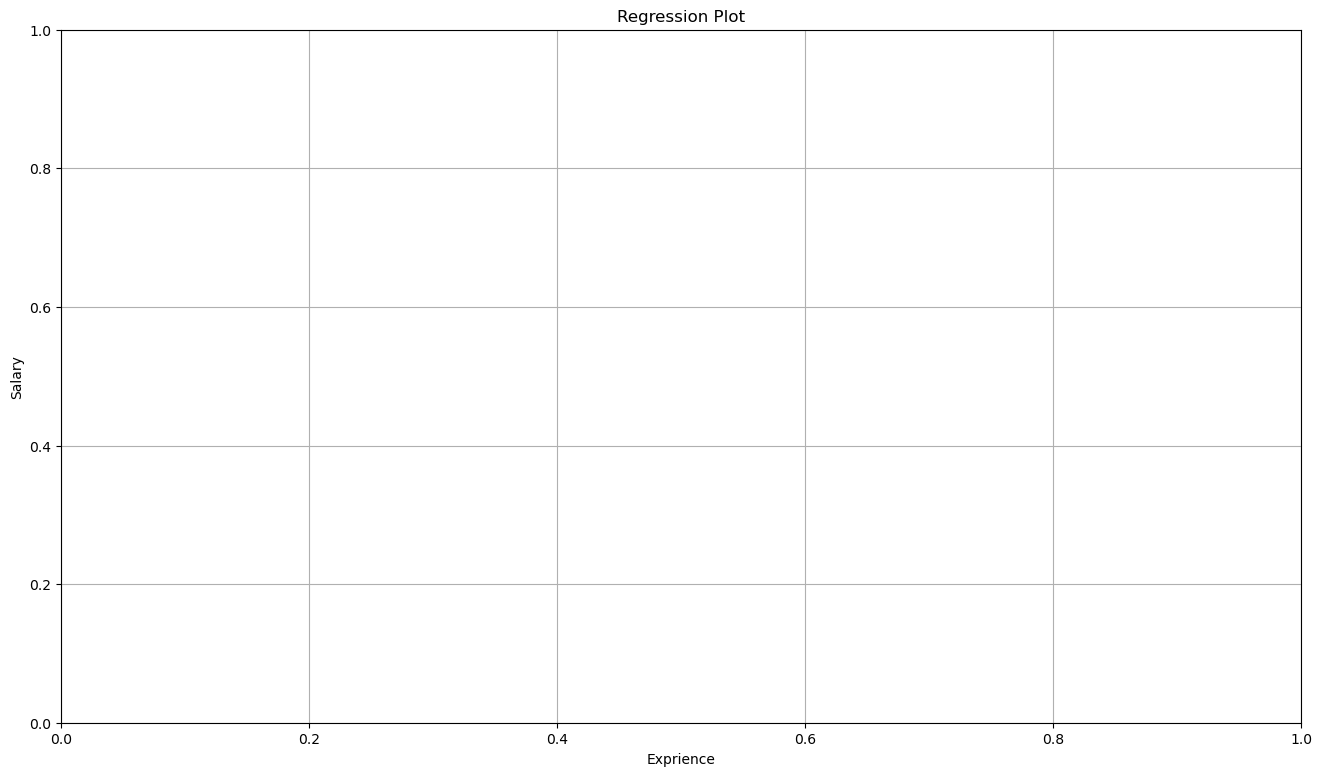

In [136]:
# Plot the data
plt.figure(figsize=(16,9))
plt.title('Regression Plot')
plt.xlabel('Exprience')
plt.ylabel('Salary')
plt.grid()
plt.scatter(x,y,label='actual',color='green')
plt.plot(x,regs.predict(x),label='predicted',color='gold')
plt.legend( )

In [ ]:
import seaborn as sns
sns.regplot(x='YearsExperience',y='Salary',data=df,color='gold')

#Multiple Regression 

In [ ]:
df=pd.read_csv('mtcars.csv')

In [ ]:
df.shape

In [ ]:
df

In [ ]:
df.corrwith(df['mpg'])

In [ ]:
# seperate the input and output
x=df[['disp','hp','wt']]
y=df[['mpg']]

In [ ]:
x

In [ ]:
y

# Building the model

In [ ]:
from sklearn.linear_model import LinearRegression
regs=LinearRegression()

In [ ]:
regs.fit(x,y)

In [ ]:
regs.coef_


In [ ]:
# check the accuracy or r2 score
regs.score(x,y)

In [ ]:
# predict on unseen data
disp=221
hp=102
wt=2.91
unseen_data=[disp,hp,wt]

In [ ]:
unseen_data

In [ ]:
regs.predict([unseen_data])

In [ ]:
plt.figure(figsize=(16,9))
plt.grid()
plt.subplot(2,2,1)
plt.title('disp vs mpg')
plt.scatter(df['disp'],df['mpg'],color='green')
plt.legend()

plt.subplot(2,2,2)
plt.title('hp vs mpg')
plt.scatter(df['hp'],df['mpg'],color='lime')
plt.legend()

plt.subplot(2,2,3)
plt.title('wt vs mpg')
plt.scatter(df['wt'],df['mpg'],color='red')
plt.legend()

# Ploynomial Regression 

In [41]:
x=np.arange(0,100,0.25)
x

array([ 0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,  2.  ,
        2.25,  2.5 ,  2.75,  3.  ,  3.25,  3.5 ,  3.75,  4.  ,  4.25,
        4.5 ,  4.75,  5.  ,  5.25,  5.5 ,  5.75,  6.  ,  6.25,  6.5 ,
        6.75,  7.  ,  7.25,  7.5 ,  7.75,  8.  ,  8.25,  8.5 ,  8.75,
        9.  ,  9.25,  9.5 ,  9.75, 10.  , 10.25, 10.5 , 10.75, 11.  ,
       11.25, 11.5 , 11.75, 12.  , 12.25, 12.5 , 12.75, 13.  , 13.25,
       13.5 , 13.75, 14.  , 14.25, 14.5 , 14.75, 15.  , 15.25, 15.5 ,
       15.75, 16.  , 16.25, 16.5 , 16.75, 17.  , 17.25, 17.5 , 17.75,
       18.  , 18.25, 18.5 , 18.75, 19.  , 19.25, 19.5 , 19.75, 20.  ,
       20.25, 20.5 , 20.75, 21.  , 21.25, 21.5 , 21.75, 22.  , 22.25,
       22.5 , 22.75, 23.  , 23.25, 23.5 , 23.75, 24.  , 24.25, 24.5 ,
       24.75, 25.  , 25.25, 25.5 , 25.75, 26.  , 26.25, 26.5 , 26.75,
       27.  , 27.25, 27.5 , 27.75, 28.  , 28.25, 28.5 , 28.75, 29.  ,
       29.25, 29.5 , 29.75, 30.  , 30.25, 30.5 , 30.75, 31.  , 31.25,
       31.5 , 31.75,

In [42]:
# Linear Equation
# y=4.5*x+12

# Polynomial Equation
y1=4.5*x**2+12
y2=4.5*x**3+12
y3=4.5*x**4+12

plt.subplot(2,2,1)
plt.plot(x,y1)
plt.subplot(2,2,2)
plt.plot(x,y3)
plt.subplot(2,2,3)
plt.plot(x,y3)

In [43]:
df=pd.read_csv('Salary_Data.csv')
x=df['YearsExperience'].values
x=x.reshape(30,1)
y=df['Salary']

regs.fit(x,y)
print("Accuracy: ",regs.score(x,y))

Accuracy:  0.9569566641435086


# Polynomial Transformation

In [44]:
from sklearn.preprocessing import PolynomialFeatures

In [45]:
poly=PolynomialFeatures(degree=5)
x_poly=poly.fit_transform(x)

In [46]:
x_poly

array([[1.00000000e+00, 1.10000000e+00, 1.21000000e+00, 1.33100000e+00,
        1.46410000e+00, 1.61051000e+00],
       [1.00000000e+00, 1.30000000e+00, 1.69000000e+00, 2.19700000e+00,
        2.85610000e+00, 3.71293000e+00],
       [1.00000000e+00, 1.50000000e+00, 2.25000000e+00, 3.37500000e+00,
        5.06250000e+00, 7.59375000e+00],
       [1.00000000e+00, 2.00000000e+00, 4.00000000e+00, 8.00000000e+00,
        1.60000000e+01, 3.20000000e+01],
       [1.00000000e+00, 2.20000000e+00, 4.84000000e+00, 1.06480000e+01,
        2.34256000e+01, 5.15363200e+01],
       [1.00000000e+00, 2.90000000e+00, 8.41000000e+00, 2.43890000e+01,
        7.07281000e+01, 2.05111490e+02],
       [1.00000000e+00, 3.00000000e+00, 9.00000000e+00, 2.70000000e+01,
        8.10000000e+01, 2.43000000e+02],
       [1.00000000e+00, 3.20000000e+00, 1.02400000e+01, 3.27680000e+01,
        1.04857600e+02, 3.35544320e+02],
       [1.00000000e+00, 3.20000000e+00, 1.02400000e+01, 3.27680000e+01,
        1.04857600e+02, 

In [47]:
regs.fit(x_poly,y)
print("Accuracy: ",regs.score(x_poly,y))

Accuracy:  0.9665546834956733


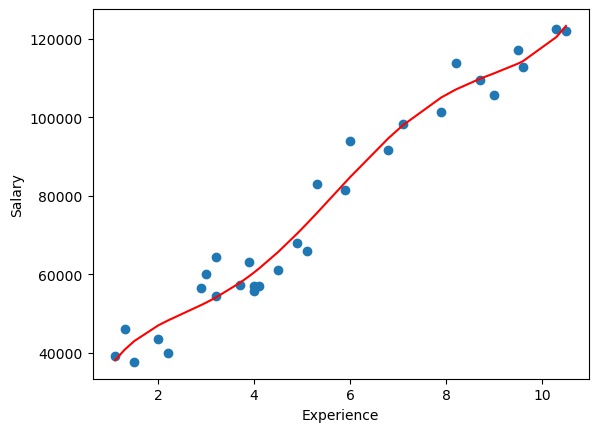

In [48]:
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.scatter(x,y)
plt.plot(x,regs.predict(x_poly),color='r')

In [49]:
for i in range(2,21):
    poly=PolynomialFeatures(degree=i)
    x_poly=poly.fit_transform(x)
    regs.fit(x_poly,y)
    print(i,':',regs.score(x_poly,y))

2 : 0.956975168321065
3 : 0.9635969766249464
4 : 0.9636560599375091
5 : 0.9665546834956733
6 : 0.9673693577169906
7 : 0.9722578921026724
8 : 0.9728154307146486
9 : 0.9732969097553397
10 : 0.9809837442309323
11 : 0.9821824872488192
12 : 0.9830431165773489
13 : 0.9830349074924566
14 : 0.9819693549315687
15 : 0.9804883646579642
16 : 0.9792408677290312
17 : 0.9800327222617843
18 : 0.96553643655429
19 : 0.9585869173869457
20 : 0.9539469637722493


# Logistic Regression 

# Sigmoid Function

In [50]:
x=np.arange(-5,5,0.5)
x

array([-5. , -4.5, -4. , -3.5, -3. , -2.5, -2. , -1.5, -1. , -0.5,  0. ,
        0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5])

In [62]:
def sigmoid(z):
    val=1/(1+np.exp(-z))
    return val

In [63]:
sigmoid(x)

array([0.00669285, 0.01098694, 0.01798621, 0.02931223, 0.04742587,
       0.07585818, 0.11920292, 0.18242552, 0.26894142, 0.37754067,
       0.5       , 0.62245933, 0.73105858, 0.81757448, 0.88079708,
       0.92414182, 0.95257413, 0.97068777, 0.98201379, 0.98901306])

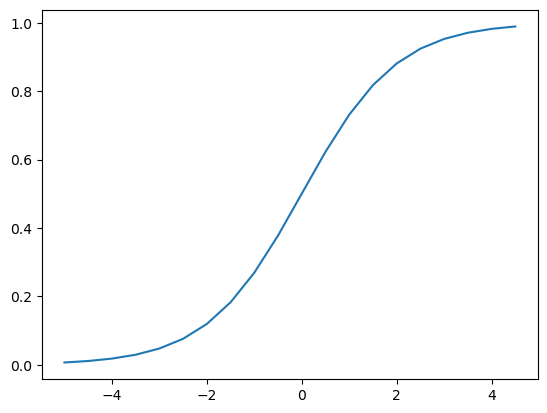

In [65]:
plt.plot(x,sigmoid(x))

### Logistic Regreession on Real World data

In [66]:
df=pd.read_csv('Social_Network_Ads.csv')

In [67]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0
...,...,...,...,...,...
395,15691863,Female,46.0,41000.0,1
396,15706071,Male,51.0,23000.0,1
397,15654296,Female,50.0,20000.0,1
398,15755018,Male,36.0,33000.0,0


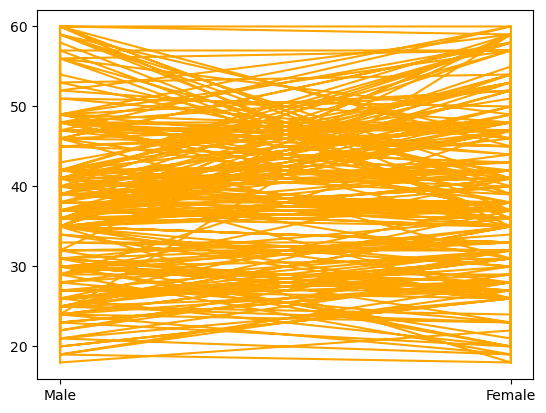

In [73]:
plt.plot(df['Gender'],df['Age'],color='orange')

In [77]:
df.corrwith(df['Purchased'])

User ID            0.007120
Age                0.622454
EstimatedSalary    0.362083
Purchased          1.000000
dtype: float64

### seperate input and output

In [80]:
x=df[['Age','EstimatedSalary']]
x

,Age,EstimatedSalary
0,19.0,19000.0
1,35.0,20000.0
2,26.0,43000.0
3,27.0,57000.0
4,19.0,76000.0
...,...,...
395,46.0,41000.0
396,51.0,23000.0
397,50.0,20000.0
398,36.0,33000.0


In [93]:
y=df['Purchased']

In [94]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [95]:
pd.get_dummies(df['Gender'])

,Female,Male
0,0,1
1,0,1
2,1,0
3,1,0
4,0,1
...,...,...
395,1,0
396,0,1
397,1,0
398,0,1


### Visualize the data

In [98]:
import matplotlib.pyplot as plt

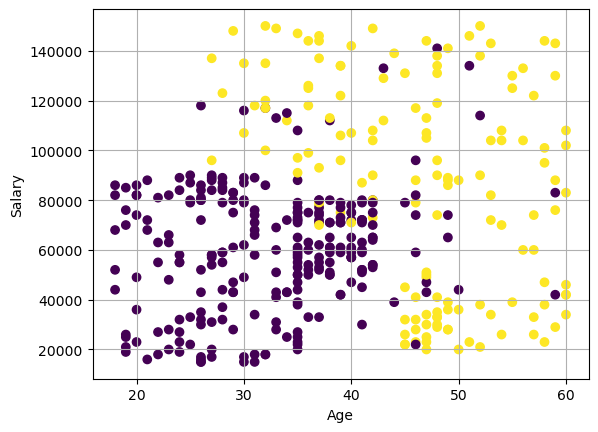

In [105]:
plt.xlabel('Age')
plt.ylabel('Salary')
plt.grid()
plt.scatter(x['Age'],x['EstimatedSalary'],c=y)

### Normalize the data

In [217]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_scaled=scaler.fit_transform(x)


In [141]:
pd.DataFrame(x_scaled).describe()
x_scaled

array([[0.02380952, 0.02962963],
       [0.4047619 , 0.03703704],
       [0.19047619, 0.20740741],
       [0.21428571, 0.31111111],
       [0.02380952, 0.45185185],
       [0.21428571, 0.31851852],
       [0.21428571, 0.51111111],
       [0.33333333, 1.        ],
       [0.16666667, 0.13333333],
       [0.4047619 , 0.37037037],
       [0.19047619, 0.48148148],
       [0.19047619, 0.27407407],
       [0.04761905, 0.52592593],
       [0.33333333, 0.02222222],
       [0.        , 0.4962963 ],
       [0.26190476, 0.48148148],
       [0.69047619, 0.07407407],
       [0.64285714, 0.08148148],
       [0.66666667, 0.0962963 ],
       [0.71428571, 0.1037037 ],
       [0.64285714, 0.05185185],
       [0.69047619, 0.25185185],
       [0.71428571, 0.19259259],
       [0.64285714, 0.05185185],
       [0.66666667, 0.05925926],
       [0.69047619, 0.03703704],
       [0.73809524, 0.0962963 ],
       [0.69047619, 0.11111111],
       [0.26190476, 0.20740741],
       [0.30952381, 0.02222222],
       [0.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


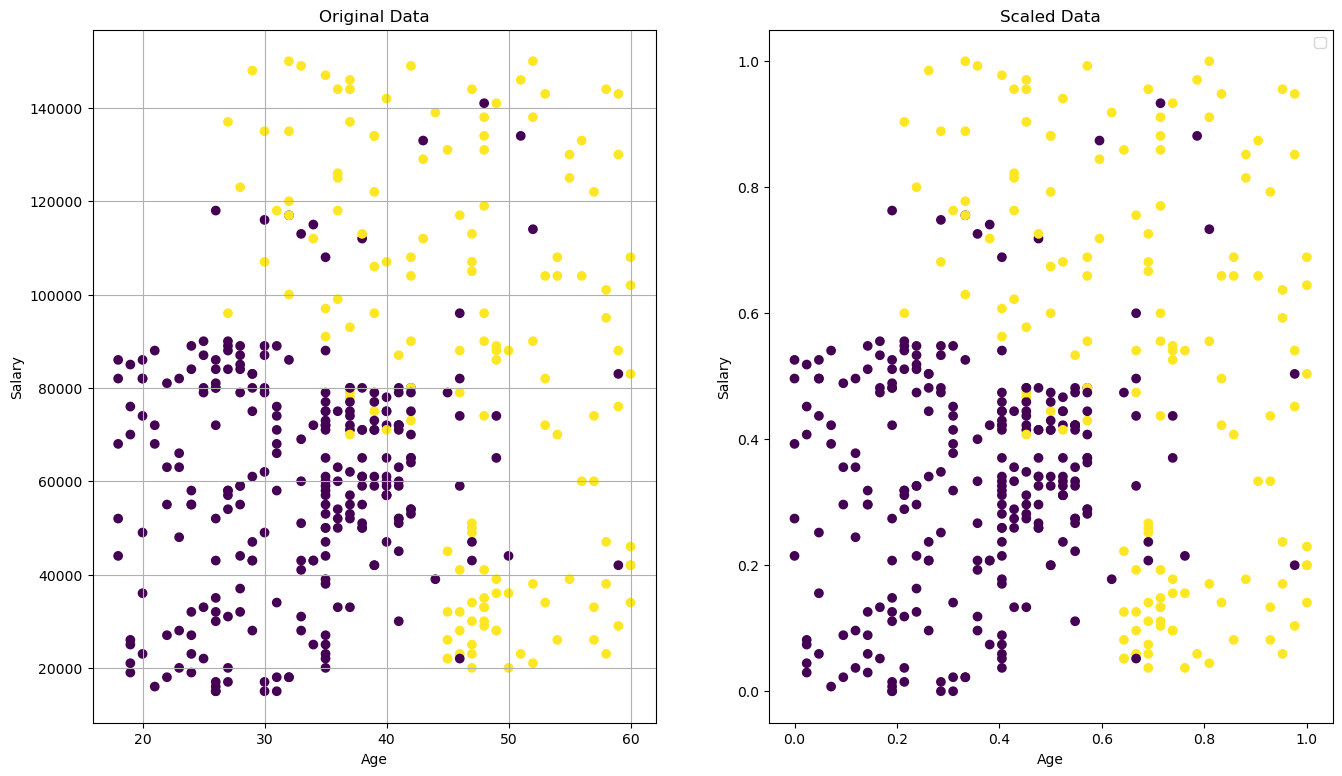

In [142]:
# Plot the data
plt.figure(figsize=(16,9))
plt.subplot(1,2,1)
plt.title('Original Data')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.scatter(x['Age'],x['EstimatedSalary'],c=y)
plt.grid()

plt.subplot(1,2,2)
plt.title('Scaled Data')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.scatter(x_scaled[:,0],x_scaled[:,1],c=y)                       

plt.legend( )

<AxesSubplot:xlabel='Purchased', ylabel='count'>

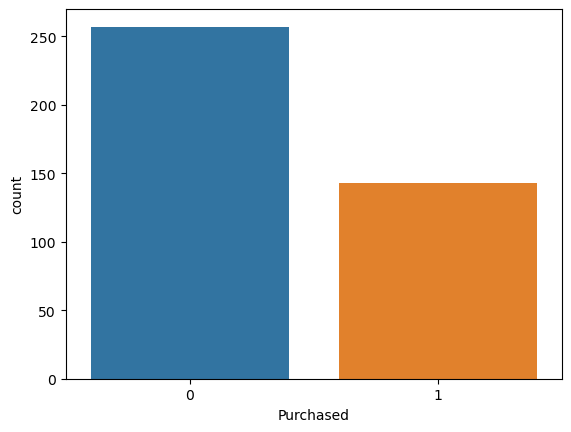

In [143]:
import seaborn as sns
sns.countplot(x=y)

In [144]:
y.value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [145]:
from sklearn.model_selection import train_test_split


In [146]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,random_state=0,test_size=0.25)

In [147]:
x_train.shape

(300, 2)

In [148]:
y_train.value_counts()

0    189
1    111
Name: Purchased, dtype: int64

In [149]:
y_test.value_counts()

0    68
1    32
Name: Purchased, dtype: int64

### Build the model

In [150]:
from sklearn.linear_model import LogisticRegression

In [151]:
classifier=LogisticRegression()

In [152]:
# Train the algorithm
classifier.fit(x_train,y_train)

LogisticRegression()

In [153]:
y_pred=classifier.predict(x_test)

In [169]:
classifier.score(x_test,y_test)

0.89

In [163]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [164]:
result=pd.DataFrame({
    'Actual': y_test,
    'Predicted ':y_pred
})

In [165]:
result

,Actual,Predicted
132,0,0
309,0,0
341,0,0
196,0,0
246,0,0
...,...,...
146,1,0
135,0,0
390,1,0
264,1,1


In [176]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[67,  1],
       [10, 22]], dtype=int64)

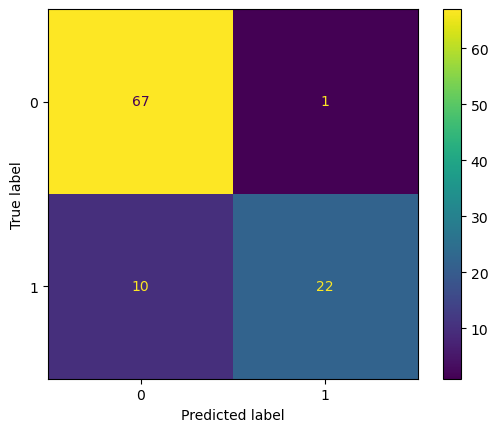

In [180]:

from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [181]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.99      0.92        68
           1       0.96      0.69      0.80        32

    accuracy                           0.89       100
   macro avg       0.91      0.84      0.86       100
weighted avg       0.90      0.89      0.88       100



In [218]:
new1=[[23,67000]]
new2=[[56,145000]]

new1=scaler.transform(new1)
new2=scaler.transform(new2)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [219]:
classifier.predict(new1)

array([0], dtype=int64)

In [220]:
classifier.predict(new2)

array([1], dtype=int64)